In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly_express as px
import pandas_datareader as web
from datetime import datetime as dt, timedelta as td
import yfinance as yf
from numpy import random as rd
from scipy import optimize



In [246]:
start = dt(2022, 4, 1)
end = dt(2023, 3, 31)
stocks = ["AVGO", 'NVDA', 'PFE']
data = yf.download(stocks, start=start, end=end)


[*********************100%***********************]  3 of 3 completed


# Question1: Brief overview of company with those stocks code: Industry/sector (IT, pharmaceutical companies)

In [144]:
companies = yf.Tickers(stocks)

# Lấy thông tin 
sectors = []
employees = []
market_caps = []
main_products = []
annual_sales = []
book_values = []

for stock in stocks:
    info = yf.Ticker(stock).info
    sector = info['sector']
    num_employees = info['fullTimeEmployees']
    market_cap = info['marketCap']
    products = info['longBusinessSummary']
    sales = info['totalRevenue']
    book_value = info['bookValue']
    
    sectors.append(sector)
    employees.append(num_employees)
    market_caps.append(market_cap)
    main_products.append(products)
    annual_sales.append(sales)
    book_values.append(book_value)

# Tạo DataFrame để lưu trữ thông tin
df = pd.DataFrame({'Stocks': stocks, 
                   'Sectors': sectors, 
                   'Employees': employees, 
                   'Market Cap': market_caps, 
                   'Main Products': main_products, 
                   'Annual Sales': annual_sales, 
                   'Book Value': book_values})

df

,Stocks,Sectors,Employees,Market Cap,Main Products,Annual Sales,Book Value
0,AVGO,Technology,20000,320508231680,"Broadcom Inc. designs, develops, and supplies ...",34411999232,55.899
1,NVDA,Technology,26196,947530301440,"NVIDIA Corporation provides graphics, and comp...",26973999104,8.962
2,PFE,Healthcare,83000,214267756544,"Pfizer Inc. discovers, develops, manufactures,...",92951003136,17.887


# Question 2: Pull daily stock prices (open) from 01/Apr/2022 - 31/Mar/2023 --> Đánh giá thông tin thống kê về số liệu


In [145]:
data_O = data['Open']
data_O

,AVGO,NVDA,PFE
Date,,,
2022-04-01,631.690002,273.750000,52.119999
2022-04-04,626.419983,267.279999,51.779999
2022-04-05,629.549988,272.540009,50.810001
2022-04-06,602.080017,249.339996,51.160000
2022-04-07,599.830017,244.410004,52.500000
...,...,...,...
2023-03-24,638.030029,270.309998,40.090000
2023-03-27,639.000000,268.369995,40.540001
2023-03-28,625.229980,264.470001,40.200001


In [146]:
for stock in stocks:
    std = np.std(data_O[stock])
    mean = np.mean(data_O[stock])
    print(stock, '-- std:',std, ', mean:' , mean)


AVGO -- std: 52.38111797882424 , mean: 543.0000401611328
NVDA -- std: 37.98440793306382 , mean: 176.42191998291017
PFE -- std: 3.937061278343755 , mean: 47.68927998352051


In [244]:
data_O.min()

AVGO    417.420013
NVDA    109.709999
PFE      39.259998
dtype: float64

# Question 3: Plot stocks prices (all 3) in one graph with all legend

In [147]:
time = data.index

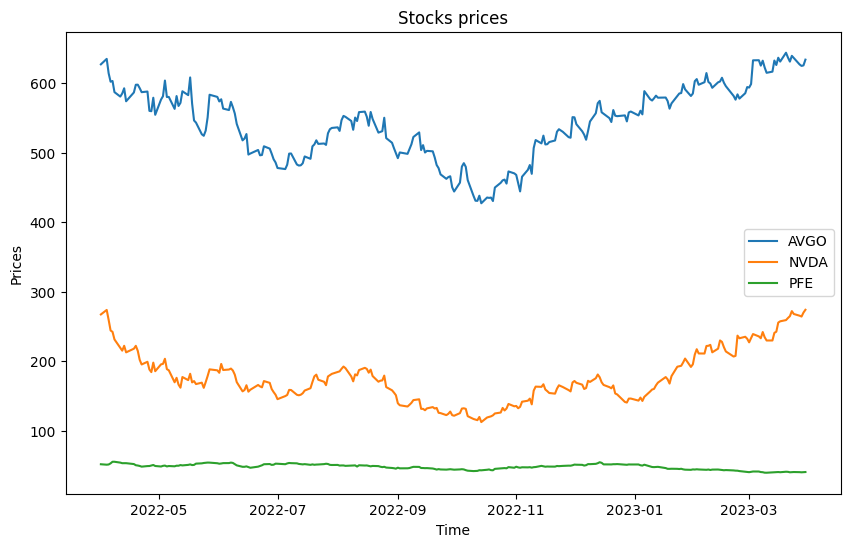

In [148]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(time, data['Close'], label=stocks)

ax.set(title="Stocks prices",
      xlabel="Time",
      ylabel="Prices");
plt.legend();

# Question 4: Plots histogram of returns of each stock (bin = 40)

In [149]:
data_C = data['Close']

In [150]:
# Tính tỷ lệ tương đối của giá cổ phiếu so với giá trước nó 1 ngày
daily_returns = (data_AC/data_AC.shift(1)) - 1

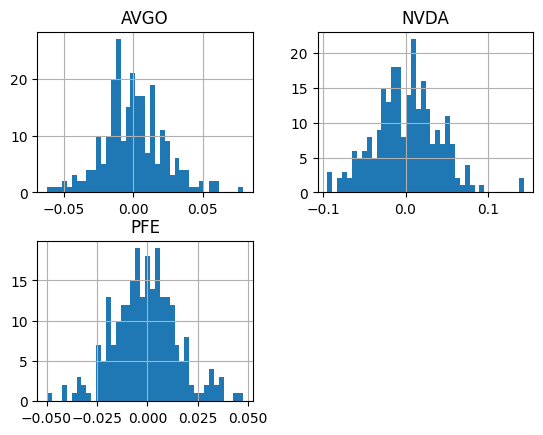

In [151]:
daily_returns.hist(bins=40);

# Question 5: Plots Markowitz’s bullet, Markowitz’s Portfolio Frontier

### Tạo trọng số có tổng bằng 1 để các tài sản đều được đầu tư

In [152]:
weights = rd.rand(3,1)
weights /= np.sum(weights)


### Bảng phân bố tài sản 

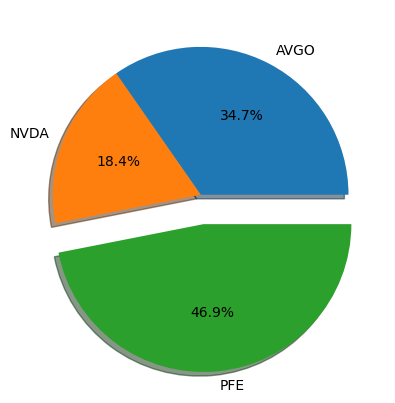

In [153]:
weights_jo = weights.T[0]

myexplode = [0, 0, 0]
if 1:
   myexplode[np.argmax(weights)]=0.2

# startangle điều chỉnh góc bắt đầu
# explode tạo sự nổi bật
# shadow tạo bóng
plt.pie(weights_jo, labels = stocks, startangle = 0, explode = myexplode, shadow= True, autopct='%1.1f%%');                                               


* Expected return
* Volatility 
* Sharpe ratio

In [154]:
# We generally do log return instead of return
log_ret = np.log(data_AC / data_AC.shift(1))

# Expected return (weighted sum of mean returns)
exp_ret = log_ret.mean().dot(weights) 
print('Expected return of the portfolio:',  exp_ret[0])

# Exp Volatility (Risk)
exp_vol = np.sqrt(weights.T.dot(log_ret.cov().dot(weights)))
print('Volatility of the portfolio: ', exp_vol[0][0])

# Sharpe ratio
sr = exp_ret / exp_vol
print('Sharpe ratio of the portfolio: ', sr[0][0])

Expected return of the portfolio: -0.00042750691527896766
Volatility of the portfolio:  0.0177983484445303
Sharpe ratio of the portfolio:  -0.024019471054368923


# Đánh giá
* sở dĩ Expected return âm xảy ra khi tổng hợp các lợi nhuận của các cổ phiếu trong danh mục đầu tư thì tổng lợi nhuận dự kiến sẽ thấp hơn lợi nhuận phi rủi ro (risk-free return) hoặc không đạt được mức lợi nhuận mong đợi
* Ta có thể thấy Volatility của AVGO biến động mạnh và mang đến nhiều rủi ro
* Sharpe ratio âm, đầu tư có thể mang lại lợi nhuận thấp hoặc thậm chí thua lỗ so với mức rủi ro mà nó mang lại. Nguyên nhân do đầu tư vào các tài sản có biến động cao, thiếu quản lý rủi ro hiệu quả.

In [155]:
n = 10000

port_weights = np.zeros(shape=(n,len(data_AC.columns))) 
port_volatility = np.zeros(n) 
port_sr = np.zeros(n) 
port_return = np.zeros(n) 

num_securities = len(data_AC.columns)

# num_securities
for i in range(n):
    # Weight each security
    weights = rd.rand(3)
    # normalize it, so that some is one
    weights /= np.sum(weights)
    port_weights[i,:] = weights 

    # Expected return (weighted sum of mean returns)
    exp_ret = log_ret.mean().dot(weights)
    port_return[i] = exp_ret

    # Exp Volatility (Risk)
    exp_vol = np.sqrt(weights.T.dot(log_ret.cov().dot(weights)))
    port_volatility[i] = exp_vol

    # Sharpe ratio
    sr = exp_ret / exp_vol
    port_sr[i] = sr

In [156]:
port_sr.max()

0.0025534797876470036

In [157]:
# Index of max Sharpe Ratio
max_sr = port_sr.max()
ind = port_sr.argmax()
# Return and Volatility at Max SR
max_sr_ret = port_return[ind]
max_sr_vol = port_volatility[ind]

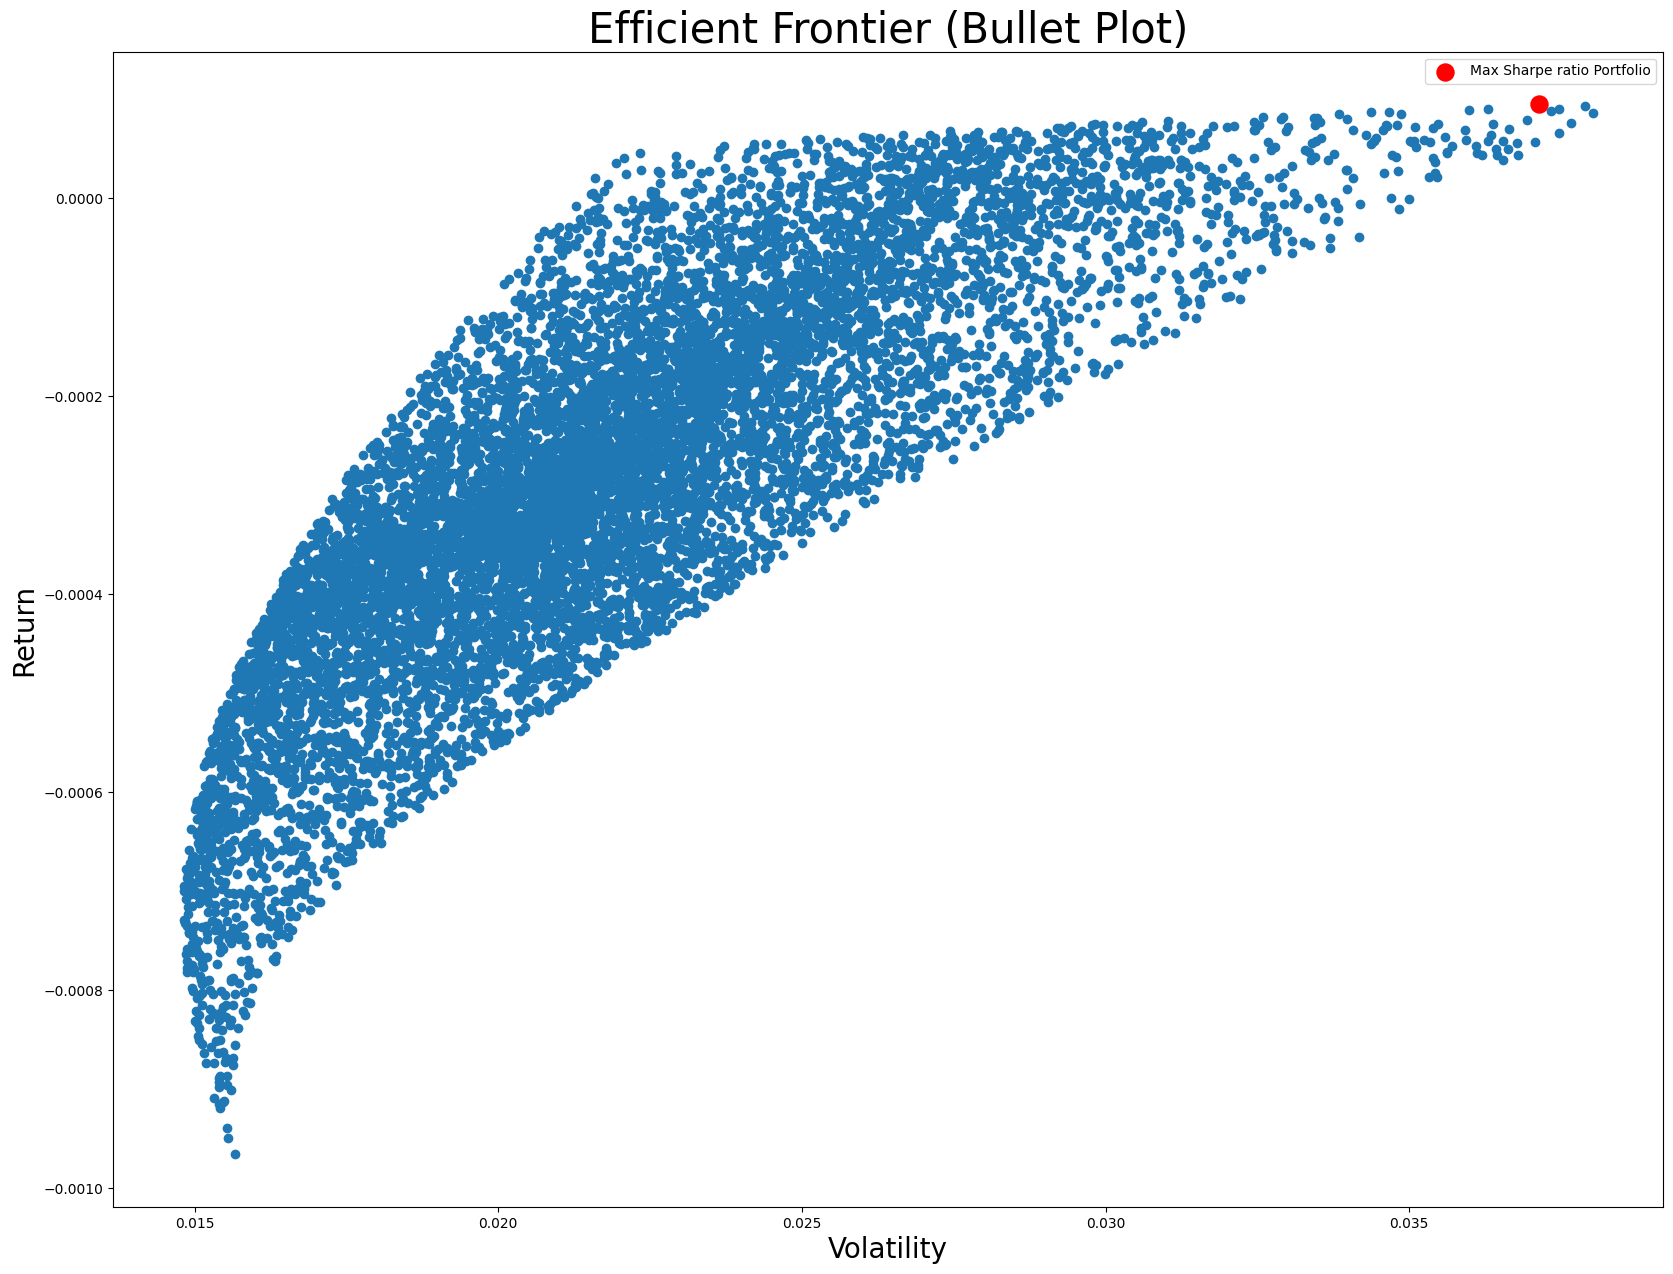

In [158]:
plt.figure(figsize=(20,15))
plt.scatter(port_volatility,port_return)
plt.xlabel('Volatility', fontsize=20)
plt.ylabel('Return', fontsize=20)
plt.title('Efficient Frontier (Bullet Plot)', fontsize=30)
plt.scatter(max_sr_vol, max_sr_ret, c='red', s=150, edgecolors='red', 
            marker='o', label='Max Sharpe ratio Portfolio')
plt.legend();

In [159]:
for weight, stock in zip(port_weights[ind],stocks):
    print(f'{round(weight * 100, 2)} % of {stock} should be bought.')
    
# best portfolio return
print(f'\nMarkowitz optimal portfolio return is : {round(max_sr_ret * 100, 2)}% with volatility \
{max_sr_vol}')

6.54 % of AVGO should be bought.
93.36 % of NVDA should be bought.
0.1 % of PFE should be bought.

Markowitz optimal portfolio return is : 0.01% with volatility 0.03714369264477301


# *252

In [160]:
log_mean = log_ret.mean() 
cov = log_ret.cov() 

In [161]:
def get_ret_vol_sr(weights):
    weights = np.array(weights)
    ret = log_mean.dot(weights)
    vol = np.sqrt(weights.T.dot(cov.dot(weights)))
    sr = ret / vol
    return np.array([ret, vol, sr])

# Negate Sharpe ratio as we need to max it but Scipy minimize the given function
def neg_sr(weights):
    return get_ret_vol_sr(weights)[-1] * -1

# check sum of weights 
def check_sum(weights):
    return np.sum(weights) - 1

# Constraints for the optimization problem
cons = {'type':'eq','fun':check_sum}
# bounds on weights
bounds = ((0,1),(0,1),(0,1))
# initial guess for optimization to start with
init_guess = [1/3 for _ in range(3)]


# Call minimizer
opt_results = optimize.minimize(neg_sr, init_guess, 
                                constraints=cons, bounds=bounds, method='SLSQP')

In [162]:
optimal_weights = opt_results.x
# optimal_weights
for st, i in zip(stocks,optimal_weights):
    print(f'Stock {st} has weight {np.round(i*100,2)} %')

Stock AVGO has weight 45.4 %
Stock NVDA has weight 54.6 %
Stock PFE has weight 0.0 %


In [163]:
mc_weights = port_weights[ind]
for st, i in zip(stocks,mc_weights):
    print(f'Stock {st} has weight {np.round(i*100,2)} %')

Stock AVGO has weight 6.54 %
Stock NVDA has weight 93.36 %
Stock PFE has weight 0.1 %


In [164]:
(optimal_weights - mc_weights)

array([ 0.38853327, -0.38752281, -0.00101046])

In [165]:
get_ret_vol_sr(optimal_weights), get_ret_vol_sr(mc_weights)

print('For a given portfolio we have: (Using SciPy optimizer)\n \n')
for i, j in enumerate('Return Volatility SharpeRatio'.split()):
    print(f'{j} is : {get_ret_vol_sr(optimal_weights)[i]}\n')
    
print('For a given portfolio we have: (Using Monte Carlo)\n \n')
for i, j in enumerate('Return Volatility SharpeRatio'.split()):
    print(f'{j} is : {get_ret_vol_sr(mc_weights)[i]}\n')

For a given portfolio we have: (Using SciPy optimizer)
 

Return is : 7.398527430414596e-05

Volatility is : 0.029421928021743957

SharpeRatio is : 0.002514630388921757

For a given portfolio we have: (Using Monte Carlo)
 

Return is : 9.484566840700056e-05

Volatility is : 0.03714369264477301

SharpeRatio is : 0.0025534797876470036



In [166]:
frontier_y = np.linspace(port_return.min(), port_return.max(), 100)
frontier_vol = []

def minimize_vol(weights):
    return get_ret_vol_sr(weights)[1]

for possible_ret in frontier_y:
    cons = ({'type':'eq','fun':check_sum},
            {'type':'eq','fun':lambda w:get_ret_vol_sr(w)[0] - possible_ret})
    result = optimize.minimize(minimize_vol, init_guess, 
                               method='SLSQP', constraints=cons, bounds=bounds)
    frontier_vol.append(result['fun'])    

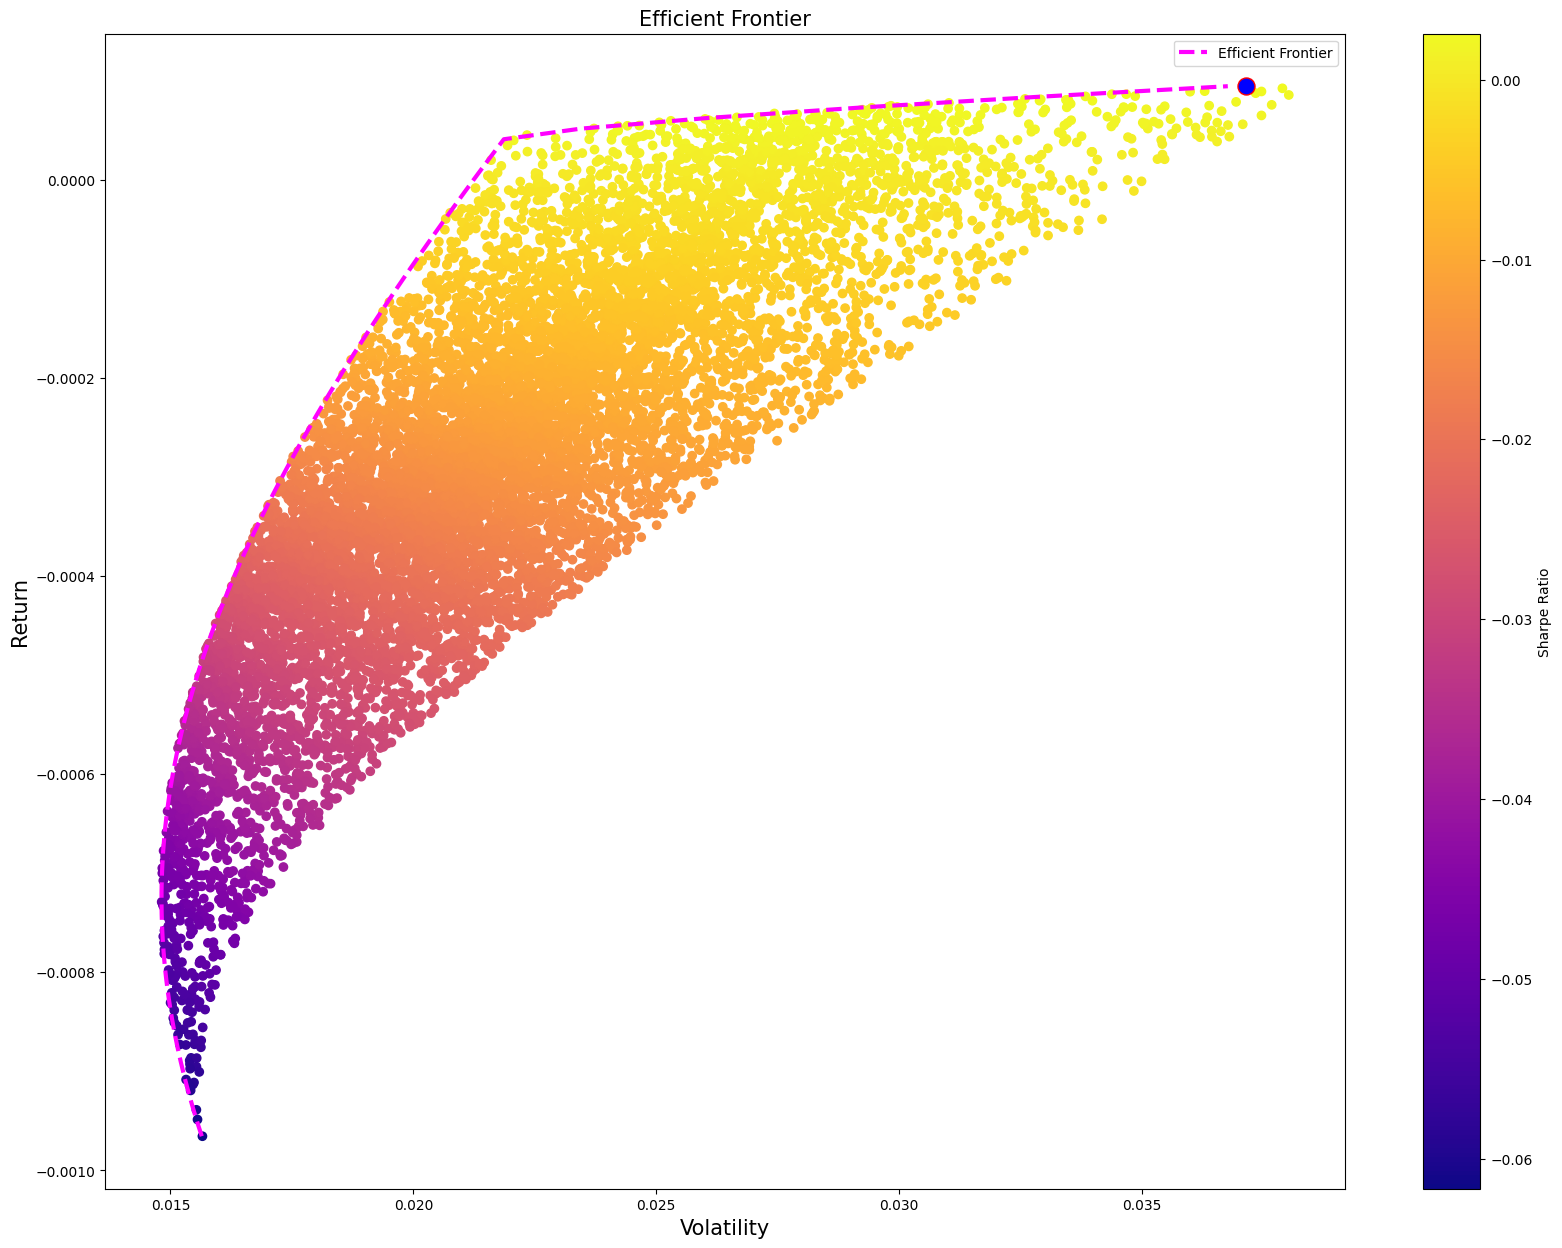

In [167]:
plt.figure(figsize=(20,15))
plt.scatter(port_volatility,port_return,c=port_sr, cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility', fontsize=15)
plt.ylabel('Return', fontsize=15)
plt.title('Efficient Frontier', fontsize=15)
plt.scatter(max_sr_vol, max_sr_ret, c='blue', s=150, edgecolors='red', 
            marker='o')

plt.plot(frontier_vol, frontier_y, c='magenta', ls='--', lw=3, 
         label='Efficient Frontier')
plt.legend();

# Question 6: Capital Asset Pricing Model (CAPM)


In [204]:
start = dt(2022, 4, 1)
end = dt(2023, 3, 31)
sp500 = yf.download('^GSPC', start=start, end=end)

[*********************100%***********************]  1 of 1 completed


In [205]:
# giá sp 500
sp500 = sp500['Close']


In [207]:
# lợi nhuận hàng ngày
daily_return_sp500 = sp500.pct_change(1).dropna()

In [208]:
daily_return_stocks = data_C.pct_change(1).dropna()

In [237]:
daily_return = pd.concat([daily_return_stocks,daily_return_sp500], 
                         axis=1).rename(columns={'Close': 'sp500'})


In [211]:
beta = {}
alpha = {}

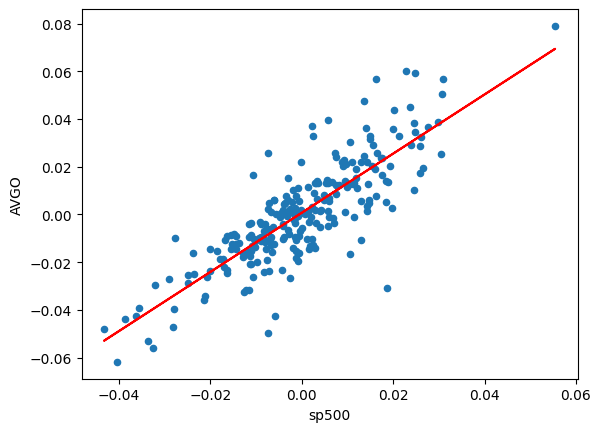

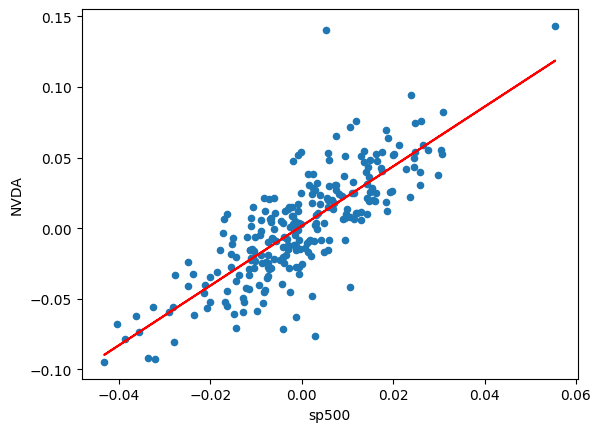

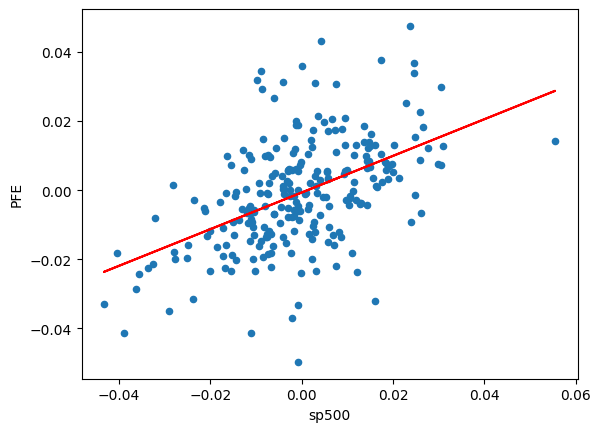

In [212]:
for i in daily_return.columns:
  if i != 'Date' and i != 'sp500':
    daily_return.plot(kind = 'scatter', x = 'sp500', y = i)
    b, a = np.polyfit(daily_return['sp500'], daily_return[i], 1)
    plt.plot(daily_return['sp500'], b * daily_return['sp500'] + a, 
             '-', color = 'r')  
    beta[i] = b    
    alpha[i] = a  


In [213]:
print(beta)
print(alpha)

{'AVGO': 1.2396190706638068, 'NVDA': 2.1118855674490553, 'PFE': 0.5306705225360406}
{'AVGO': 0.0007225364909740285, 'NVDA': 0.0015925490312279585, 'PFE': -0.0006696982842421088}


In [220]:
ER={}
rf = 0
rm = daily_return.mean()

In [230]:
for i in stocks:
  ER[i] = rf + (beta[i] * (rm[i]-rf)) 

In [242]:
for i in stocks:
    print('Expected return based on CAPM for {} is {}%'.format(i,ER[i]))

Expected return based on CAPM for AVGO is 0.00034975376902620254%
Expected return based on CAPM for NVDA is 0.0017787884633015767%
Expected return based on CAPM for PFE is -0.0004554350736332436%


In [235]:
portfolio_weights = 1/3 * np.ones(3) 
ER_portfolio = sum(list(ER.values()) * portfolio_weights)

In [236]:
ER_portfolio

0.0005577023862315118